<a href="https://colab.research.google.com/github/promiseeselojor/python-data-science-templates/blob/main/Quantium_Data_Analytics_Virtual_Internship_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quantium Virtual Internship - Retail Strategy and Analytics**

## **Import libraries**

In [106]:
#import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import mpld3





## **Loading and viewing the Data**

In [80]:
#load the data into the respective dataframes

purchase = pd.read_csv("QVI_purchase_behaviour.csv")
transaction = pd.read_excel("QVI_transaction_data.xlsx")


In [81]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [10]:
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


# **Preparing The Data (Data Cleaning)**

In [20]:
#Displayes the numbers of roles and columns for the purchase dataframe
purchase.shape

(62263, 3)

In [21]:
#displays the numbers of roles and columns for the transaction dataframe
transaction.shape

(264836, 8)

In [22]:
#Return info on the tansaction dataset
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


The date column isnt in a datetime data type, rather its in int64 excel date format. We need to convert it to datetime. We do this using the to.datetime() function from pandas

In [82]:
#convert date column to a date format
transaction['DATE'] = pd.to_datetime(transaction['DATE'], unit='D', origin='1899-12-30')

transaction.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [44]:
#examine the PROD_NAME
print(transaction['PROD_NAME'])


0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object


Since we are only performing analysis on chips, we need to make sure all the products in that column are chip brands and remove any other brand or product that is not considered a chip. I'm going to use the re library from python

In [86]:
#check if the PROD_NAME column contains the word 'chip' and its varations(chips,chp) and remove the rows that dont match
mask = transaction['PROD_NAME'].str.lower().str.contains(r'chips|chip|chp', case=False, na=False)

chip_transaction = transaction[mask]


Perform summary statistics to check if there any outliers or null values.

In [87]:
#perform summary statistics
chip_transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,87335.000000,8.733500e+04,87335.000000,87335.000000,87335.000000,87335.000000
mean,135.525185,1.360239e+05,135604.567127,49.949619,1.910620,7.286420
std,76.853472,8.095134e+04,78071.398801,34.450103,1.007451,3.943887
min,1.000000,1.000000e+03,1.000000,1.000000,1.000000,1.900000
25%,70.000000,7.010000e+04,68056.500000,16.000000,2.000000,6.000000
50%,131.000000,1.314830e+05,135822.000000,42.000000,2.000000,6.600000
75%,203.000000,2.032830e+05,203488.000000,78.000000,2.000000,8.800000
max,272.000000,2.373711e+06,270209.000000,111.000000,200.000000,650.000000


It seems we have an outlier in the product quantity and product sales. A purchase of 200 chips was made. Let's examine this record

In [88]:
#find the row where the PROD_QTY equals 200
chip_transaction[chip_transaction['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


We have to records of 200 chips being bought. he cocurence was just once a year, which measn it's most likely a commercial customer who may just be buying wholesale to resell. We wont need this in our dataset so we are going to remove the rows

In [110]:
#drop rows where the PROD_QTY is equal 200
chip_transaction = chip_transaction.drop(chip_transaction[chip_transaction['PROD_QTY'] == 200].index)

#check if rows have been deleted
chip_transaction[chip_transaction['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


Next we take a look at the number of transactions over the overall time period to check if there's any missing data in the dataset. 

In [95]:
chip_transaction['DATE'].value_counts()

2018-12-24    327
2018-12-19    302
2018-12-23    300
2019-06-14    288
2018-12-21    286
             ... 
2019-06-22    204
2019-01-15    200
2018-07-01    198
2018-08-17    192
2018-10-18    187
Name: DATE, Length: 364, dtype: int64

We have 364 dates in total isntead of 365 dates meaning there's a missing date. To find this missing date, we create a sequence of date ranging from 1st July 2018 to 1st of Jun 2019 and chart the number of transactions during this time period


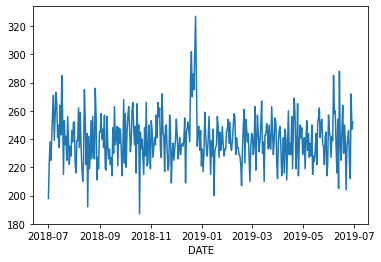

In [101]:
date_range = pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')


#group the dataframe by Date column and get the number transactions per date
transactions_by_date = chip_transaction.groupby(chip_transaction['DATE'].dt.date).size()

#plot the graph
transactions_by_date.plot()
plt.show()

We start by checking each of the datasets for missing or null values. For this i'm going to use the isna() method which returns a dataframe of boolean values indicating whether a field is null or not. 

I will also group missing values by column using the sum() method

In [ ]:
#display the number of missing values per column from the purchase dataset
purchase.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

There are no missing values in any of the columns for the purchase dataset

In [ ]:
#display the number of missing values per column from the purchase dataset
transaction.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

## **Dropping Columns**

The Date column in the transaction dataset is incorrectly formated and wont be useful in our analysis. Trying to format it using the datetime function will result in an error cause of the improper formatting

In [ ]:
#Drop the date column in the transaction dataset
transaction.drop(["DATE"],axis=1,inplace=True)
transaction.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


## **Merging Dataframes**

In [ ]:
#perform a left join on the transaction and purchase dataframe
merged_df = pd.merge(transaction, purchase, how='left', on='LYLTY_CARD_NBR')
merged_df.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [ ]:
#check for null values
merged_df.isna().sum()

STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

I'm going to add a new colum which i think will be very useful in our analysis which is the average price per unit

In [ ]:
# add a column for the average price per unit
merged_df['AVG_PRICE_PER_UNIT'] = merged_df['TOT_SALES']/merged_df['PROD_QTY']
merged_df.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,AVG_PRICE_PER_UNIT
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,3.00
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,2.10
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,4.60


# **Analyzing the Data**

## **Customer Category Analysis**

In [ ]:
# Create a pivot table of the 'TOT_SALES' grouped by 'PREMIUM CUSTOMER' and 'LIFESTAGE'
pivot_table = merged_df.pivot_table(values=['TOT_SALES'], index=['PREMIUM_CUSTOMER', 'LIFESTAGE'], aggfunc='sum')

#Order from lowest to highest so that it can appear from highest to lowest in the plot
pivot_table = pivot_table.sort_values(by = 'TOT_SALES', ascending = True)

#display pivot table
pivot_table


TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                        
Premium          NEW FAMILIES             11491.10
Mainstream       NEW FAMILIES             17013.90
Budget           NEW FAMILIES             21928.45
                 MIDAGE SINGLES/COUPLES   35514.80
Premium          YOUNG SINGLES/COUPLES    41642.10
                 MIDAGE SINGLES/COUPLES   58432.65
Budget           YOUNG SINGLES/COUPLES    61141.60
Premium          OLDER FAMILIES           81958.40
                 YOUNG FAMILIES           84025.50
Mainstream       MIDAGE SINGLES/COUPLES   90803.85
                 YOUNG FAMILIES           92788.75
Premium          RETIREES                 97646.05
Mainstream       OLDER FAMILIES          103445.55
Budget           RETIREES                113147.80
Premium          OLDER SINGLES/COUPLES   132263.15
Mainstream       OLDER SINGLES/COUPLES   133393.80
Budget           OLDER SINGLES/COUPLES   136769.80
                 YOUNG FAMILIES          139345.85
Mainstream       RETIREES                155677.05
                 YOUNG SINGLES/COUPLES   157621.60
Budget           OLDER FAMILIES          168363.25

<Figure size 26424x18432 with 0 Axes>

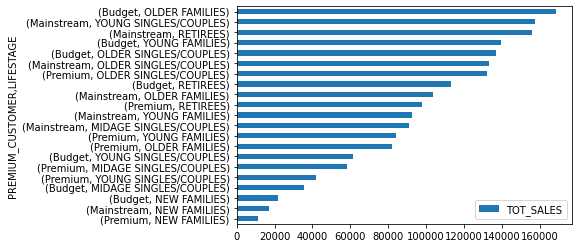

In [ ]:
#plot total sales by LIFESTAGE and PREMIUM_CUSTOMERS
plt.figure(figsize= (367,256))
pivot_table.plot(kind='barh', stacked = True)
plt.show()


A large of majority of sales came from the Budget-older families, mainstream- young single/couples, and mainstream-retirees. We need to find out if the higher sales are due to there being more customers who buy chips

In [ ]:
#create a pivot table of number of purchases grouped by  'PREMIUM_CUSTOMER' and 'LIFESTAGE'
pivot_table2 = merged_df.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', aggfunc='size')

#display pivot table
pivot_table2

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,5020,11874,8216
NEW FAMILIES,3005,2325,1589
OLDER FAMILIES,23160,14244,11192
OLDER SINGLES/COUPLES,18407,18318,17754
RETIREES,15201,21466,13096
YOUNG FAMILIES,19122,12907,11563
YOUNG SINGLES/COUPLES,9242,20854,6281


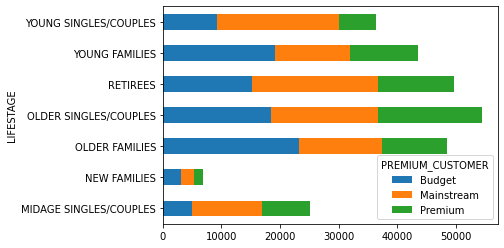

In [ ]:
#plot total number of purhases grouped by LIFESTAGE and PREMIUM_CUSTOMERS

pivot_table2.plot(kind='barh', stacked = True)
plt.show()

A large marjority of purchases were made from the Budget-older and younger families, and  Mainstream-retirees. Let's also check if the higher sales is driven by more units of chips being bought

In [ ]:
# Create a pivot table of 'PROD_QTY' grouped by 'PREMIUM CUSTOMER' and 'LIFESTAGE'
pivot_table3 = merged_df.pivot_table(values=['PROD_QTY'], index=['PREMIUM_CUSTOMER', 'LIFESTAGE'], aggfunc='sum')

pivot_table3 = pivot_table.sort_values(by = 'PROD_QTY', ascending = True)

#display pivot table
pivot_table3


PROD_QTY
PREMIUM_CUSTOMER LIFESTAGE                       
Premium          NEW FAMILIES                2957
Mainstream       NEW FAMILIES                4319
Budget           NEW FAMILIES                5571
                 MIDAGE SINGLES/COUPLES      9496
Premium          YOUNG SINGLES/COUPLES      11331
                 MIDAGE SINGLES/COUPLES     15526
Budget           YOUNG SINGLES/COUPLES      16671
Premium          OLDER FAMILIES             22171
                 YOUNG FAMILIES             22406
Mainstream       MIDAGE SINGLES/COUPLES     22699
Premium          RETIREES                   24884
Mainstream       YOUNG FAMILIES             25044
                 OLDER FAMILIES             27756
Budget           RETIREES                   28764
Premium          OLDER SINGLES/COUPLES      33986
Mainstream       OLDER SINGLES/COUPLES      34997
Budget           OLDER SINGLES/COUPLES      35220
                 YOUNG FAMILIES             37111
Mainstream       YOUNG SINGLES/COUPLES      38632
                 RETIREES                   40518
Budget           OLDER FAMILIES             45065

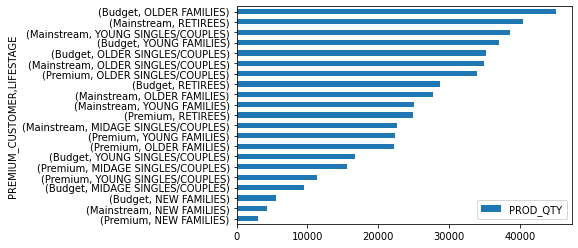

In [ ]:
#plot total product quantity by LIFESTAGE and PREMIUM_CUSTOMERS
pivot_table3.plot(kind='barh', stacked = True)
plt.show()

In [ ]:
# Create a pivot table of 'AVG_PRICE _PER_UNIT' grouped by 'PREMIUM CUSTOMER' and 'LIFESTAGE'
pivot_table4 = merged_df.pivot_table(values=['AVG_PRICE_PER_UNIT'], index=['PREMIUM_CUSTOMER', 'LIFESTAGE'], aggfunc='mean')

#display pivot table
pivot_table4


AVG_PRICE_PER_UNIT
PREMIUM_CUSTOMER LIFESTAGE                                 
Budget           MIDAGE SINGLES/COUPLES            3.728496
                 NEW FAMILIES                      3.919251
                 OLDER FAMILIES                    3.733344
                 OLDER SINGLES/COUPLES             3.877022
                 RETIREES                          3.924883
                 YOUNG FAMILIES                    3.753659
                 YOUNG SINGLES/COUPLES             3.637681
Mainstream       MIDAGE SINGLES/COUPLES            4.000101
                 NEW FAMILIES                      3.916581
                 OLDER FAMILIES                    3.727383
                 OLDER SINGLES/COUPLES             3.803800
                 RETIREES                          3.833343
                 YOUNG FAMILIES                    3.707097
                 YOUNG SINGLES/COUPLES             4.071485
Premium          MIDAGE SINGLES/COUPLES            3.752915
                 NEW FAMILIES                      3.871743
                 OLDER FAMILIES                    3.704543
                 OLDER SINGLES/COUPLES             3.887220
                 RETIREES                          3.921323
                 YOUNG FAMILIES                    3.752402
                 YOUNG SINGLES/COUPLES             3.645518

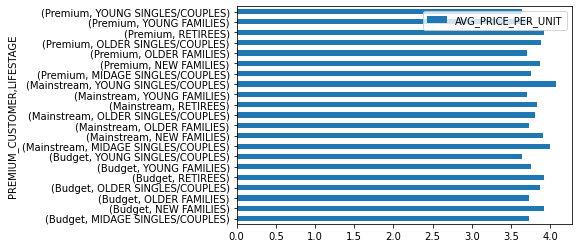

In [ ]:
#plot average price per unit by LIFESTAGE and PREMIUM_CUSTOMERS
pivot_table4.plot(kind='barh', stacked = True)
plt.show()

From the graph, we can see that Mainstream-Young Singles/Couples and Mainstream -Midage Singles/Couples are willing to pay more per packet of chips compared to their budget and premium counterparts


## **Product Analysis**

In [ ]:
pivot_table2 = merged_df.pivot_table(values = ['PROD_QTY', 'TOT_SALES'], index = 'PROD_NAME', aggfunc = 'sum')

pivot_table2 = pivot_table2.sort_values(by='TOT_SALES')


pivot_table2


,PROD_QTY,TOT_SALES
PROD_NAME,,
Woolworths Medium Salsa 300g,2700,4050.0
Woolworths Mild Salsa 300g,2823,4234.5
WW Crinkle Cut Original 175g,2666,4532.2
Sunbites Whlegrn Crisps Frch/Onin 90g,2706,4600.2
WW Crinkle Cut Chicken 175g,2766,4702.2
...,...,...
Smiths Crinkle Original 330g,6018,34302.6
Kettle Mozzarella Basil & Pesto 175g,6381,34457.4
Smiths Crinkle Chips Salt & Vinegar 330g,6106,34804.2


The top 5 products that brought in the most revenue($) 

1. Dorito Corn Chp Supreme 380g
2. Smiths Crnkle Chip Orgnl Big Bag 380g
3. Smiths Crinkle Chips Salt & Vinegar 330g
4. Kettle Mozzarella Basil & Pesto 175g
5. Smiths Crinkle Original 330g

The bottom 5 products that brought in the least amount of revenue($): 

1. Woolworths Medium Salsa 300g
2. Woolworths Mild Salsa 300g
3. WW Crinkle Cut Original 175g
4. Sunbites Whlegrn Crisps Frch/Onin 90g
5. WW Crinkle Cut Chicken 175g	